In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [2]:
world_happiness=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

In [3]:
df=world_happiness.copy()

**Veri Seti Hikayesi**

Country name: Ülkelerin İsimleri (Afghanistan, Albenia, ......,Zimbabwe)

year: Hangi Yıllarda verilerin toplandığı (2008 to 2020)

Life ladder: yaşam kalitesi (2.375 to 8.019)

Log GDP per capita: gayri safi yurt içi hasıla (6.635 to 11.648)

Social support: Sosyal Destek (0.290 to 0.905)

Healthy life expectancy at birth: Sağlıklı yaşam yüzdesi (32.300 to 77.100)

Freedom to make life choices: Hayatını şekillendirmede özgürlük (0.258 to 0.985)

Generosity: Cömertlik (-0.335 to 0.698)

Perceptions of corruption	: Yolsuzluk Algısı (0.035 to 0.983)

Positive affect	: pozitif etki (0.322 to 0.944)

Negative affect : negatif etki (0.083 to 0.705)


In [4]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [5]:
df.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1944,Zimbabwe,2016,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235
1948,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789,0.703,0.346


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [7]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


# Aykırı Gözlem Analizi

In [9]:
df_numeric= df.select_dtypes(include = ['float64', 'int64']) 
df_numeric

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...
1944,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [10]:
from sklearn.neighbors import LocalOutlierFactor

In [11]:
clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [12]:
clf

LocalOutlierFactor(contamination=0.1)

In [13]:
df_numeric_full=df_numeric.dropna()

In [14]:
clf.fit_predict(df_numeric_full)

array([ 1,  1,  1, ...,  1,  1, -1])

In [15]:
df_scores = clf.negative_outlier_factor_

In [16]:
df_scores[0:10]

array([-1.04096783, -1.03229863, -1.02532589, -1.00259182, -0.99436791,
       -1.01069885, -0.99210315, -0.98227076, -0.98071261, -1.19694123])

In [17]:
np.sort(df_scores)[0:20]

array([-2.97454274, -1.98333437, -1.88975391, -1.84338346, -1.74411629,
       -1.73300191, -1.72169786, -1.68383021, -1.6490629 , -1.61569565,
       -1.57885214, -1.57109746, -1.49667268, -1.45828615, -1.45652591,
       -1.43611832, -1.41933013, -1.41666538, -1.36334198, -1.32578802])

In [18]:
esik_deger = np.sort(df_scores)[1]
esik_deger

-1.98333437187866

In [19]:
aykiri_tf = df_scores > esik_deger
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

### Silme

In [20]:
yeni_df=df_numeric_full[df_scores>esik_deger]
yeni_df

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...
1944,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [21]:
df_numeric_full[~(df_scores>esik_deger)] 

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
676,2010,3.766,7.384,0.554,32.30,0.373,0.216,0.848,0.555,0.293
677,2011,4.845,7.423,0.567,36.86,0.413,0.243,0.682,0.625,0.245


In [22]:
df_numeric_full[df_scores==esik_deger]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
677,2011,4.845,7.423,0.567,36.86,0.413,0.243,0.682,0.625,0.245


### baskılama


In [23]:
baski_deger=df_numeric_full[df_scores==esik_deger]
baski_deger


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
677,2011,4.845,7.423,0.567,36.86,0.413,0.243,0.682,0.625,0.245


In [24]:
aykirilar=df_numeric_full[~aykiri_tf]
aykirilar

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
676,2010,3.766,7.384,0.554,32.30,0.373,0.216,0.848,0.555,0.293
677,2011,4.845,7.423,0.567,36.86,0.413,0.243,0.682,0.625,0.245


In [25]:
res=aykirilar.to_records(index=False) # buarada aykirilar np dizisi oldu
res[:]

rec.array([(2010, 3.766, 7.384, 0.554, 32.3 , 0.373, 0.216, 0.848, 0.555, 0.293),
           (2011, 4.845, 7.423, 0.567, 36.86, 0.413, 0.243, 0.682, 0.625, 0.245)],
          dtype=[('year', '<i8'), ('Life Ladder', '<f8'), ('Log GDP per capita', '<f8'), ('Social support', '<f8'), ('Healthy life expectancy at birth', '<f8'), ('Freedom to make life choices', '<f8'), ('Generosity', '<f8'), ('Perceptions of corruption', '<f8'), ('Positive affect', '<f8'), ('Negative affect', '<f8')])

In [26]:
res[:]=baski_deger.to_records(index=False)
res

rec.array([(2011, 4.845, 7.423, 0.567, 36.86, 0.413, 0.243, 0.682, 0.625, 0.245),
           (2011, 4.845, 7.423, 0.567, 36.86, 0.413, 0.243, 0.682, 0.625, 0.245)],
          dtype=[('year', '<i8'), ('Life Ladder', '<f8'), ('Log GDP per capita', '<f8'), ('Social support', '<f8'), ('Healthy life expectancy at birth', '<f8'), ('Freedom to make life choices', '<f8'), ('Generosity', '<f8'), ('Perceptions of corruption', '<f8'), ('Positive affect', '<f8'), ('Negative affect', '<f8')])

In [27]:
df_numeric_full[~aykiri_tf] = pd.DataFrame(res, index=df_numeric_full[~aykiri_tf].index)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [28]:
df_numeric_full[~aykiri_tf]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
676,2011,4.845,7.423,0.567,36.86,0.413,0.243,0.682,0.625,0.245
677,2011,4.845,7.423,0.567,36.86,0.413,0.243,0.682,0.625,0.245


# Eksik Verilerde Gözlem Analizi

In [29]:
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [30]:
df_numeric = df.select_dtypes(include = ['float64', 'int64']) 
df_numeric

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...
1944,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [31]:
df_numeric.isnull().sum()

year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [32]:
import seaborn as sns
import missingno as msno

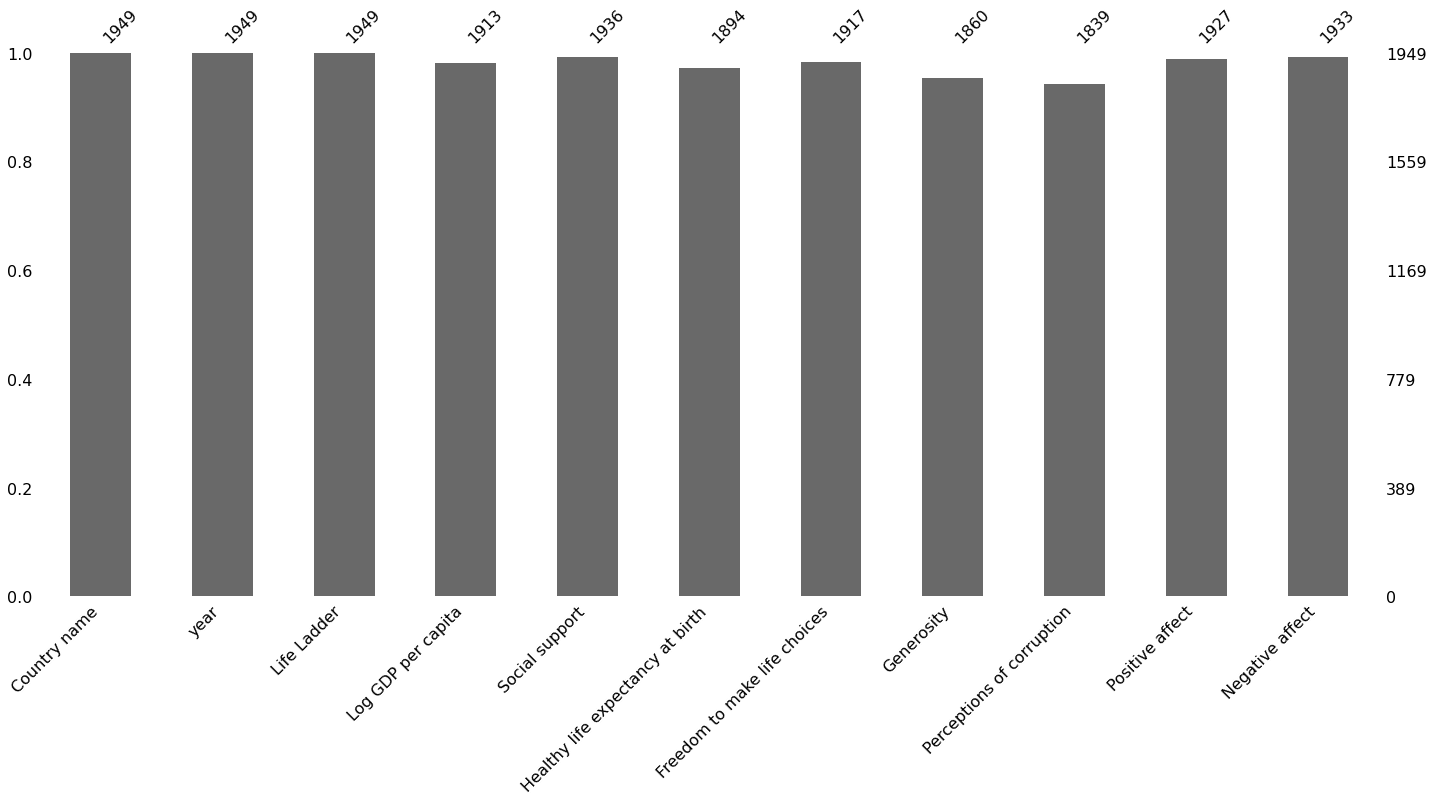

In [33]:
msno.bar(df); # Verileri görselleştirdiğiğmizde eksik veriler gözükmektedir.

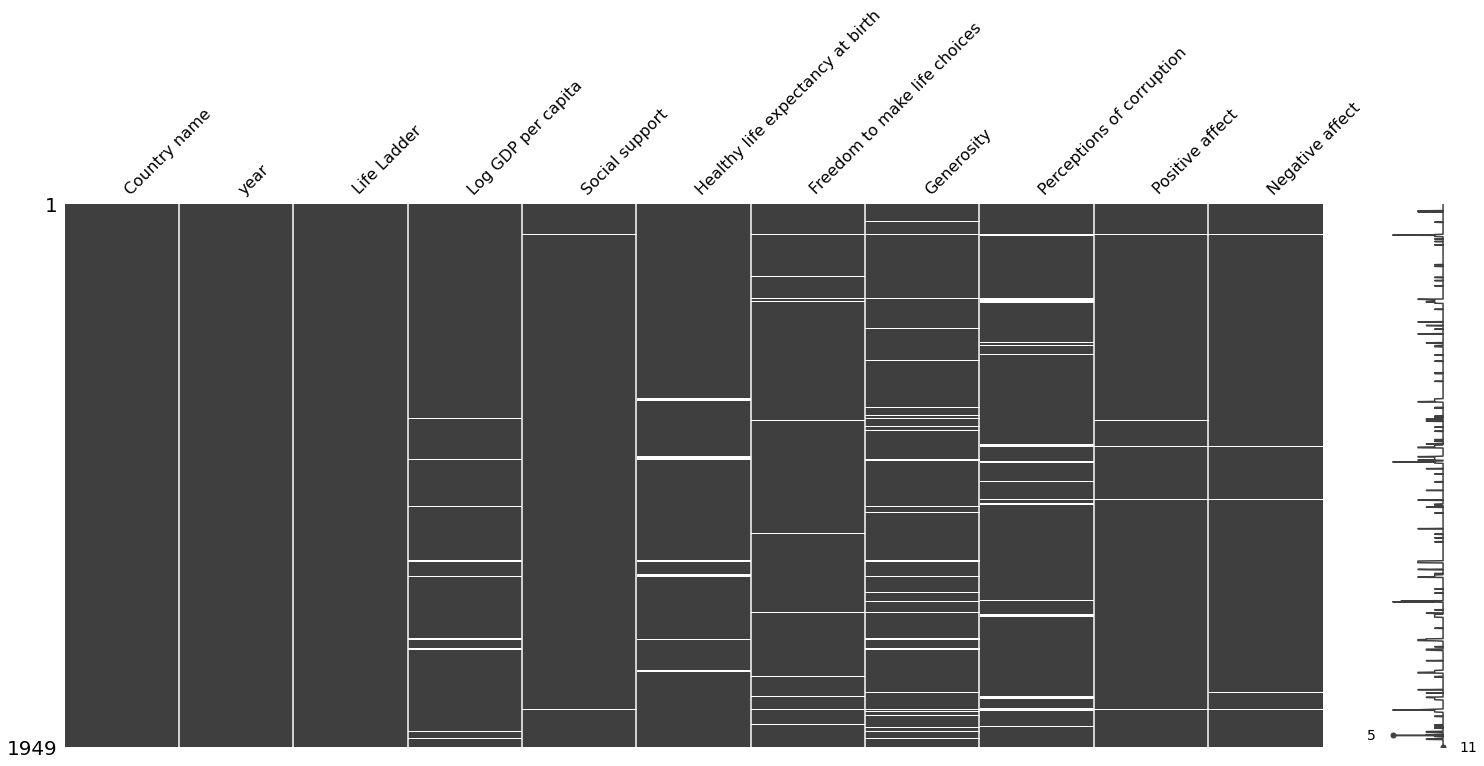

In [34]:
msno.matrix(df); # Eksik veriler burada daha net gözükmektedir

In [35]:
df.dropna().isnull().sum() # dropna dediğimiz zaman tüm verileri silebiliriz

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [36]:
# Ortalama Değer Atayabiliriz
df2=df_numeric.fillna(df_numeric.mean()[:])
df2.isnull().sum()

year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

## Tahmine Dayalı değer atama

In [37]:
df_numeric.isnull().sum()

year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [38]:
!pip install ycimpute

In [39]:
from ycimpute.imputer import knnimput

In [40]:
var_names = list(df_numeric)

In [41]:
n_df = np.array(df_numeric)

In [42]:
n_df[0:10]

array([[ 2.008e+03,  3.724e+00,  7.370e+00,  4.510e-01,  5.080e+01,
         7.180e-01,  1.680e-01,  8.820e-01,  5.180e-01,  2.580e-01],
       [ 2.009e+03,  4.402e+00,  7.540e+00,  5.520e-01,  5.120e+01,
         6.790e-01,  1.900e-01,  8.500e-01,  5.840e-01,  2.370e-01],
       [ 2.010e+03,  4.758e+00,  7.647e+00,  5.390e-01,  5.160e+01,
         6.000e-01,  1.210e-01,  7.070e-01,  6.180e-01,  2.750e-01],
       [ 2.011e+03,  3.832e+00,  7.620e+00,  5.210e-01,  5.192e+01,
         4.960e-01,  1.620e-01,  7.310e-01,  6.110e-01,  2.670e-01],
       [ 2.012e+03,  3.783e+00,  7.705e+00,  5.210e-01,  5.224e+01,
         5.310e-01,  2.360e-01,  7.760e-01,  7.100e-01,  2.680e-01],
       [ 2.013e+03,  3.572e+00,  7.725e+00,  4.840e-01,  5.256e+01,
         5.780e-01,  6.100e-02,  8.230e-01,  6.210e-01,  2.730e-01],
       [ 2.014e+03,  3.131e+00,  7.718e+00,  5.260e-01,  5.288e+01,
         5.090e-01,  1.040e-01,  8.710e-01,  5.320e-01,  3.750e-01],
       [ 2.015e+03,  3.983e+00,  7.702e+0

In [43]:
n_df.shape

(1949, 10)

In [44]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/1949 with 0 missing, elapsed time: 0.655
Imputing row 101/1949 with 0 missing, elapsed time: 0.656
Imputing row 201/1949 with 0 missing, elapsed time: 0.658
Imputing row 301/1949 with 0 missing, elapsed time: 0.659
Imputing row 401/1949 with 0 missing, elapsed time: 0.660
Imputing row 501/1949 with 1 missing, elapsed time: 0.661
Imputing row 601/1949 with 0 missing, elapsed time: 0.662
Imputing row 701/1949 with 1 missing, elapsed time: 0.663
Imputing row 801/1949 with 1 missing, elapsed time: 0.665
Imputing row 901/1949 with 0 missing, elapsed time: 0.666
Imputing row 1001/1949 with 0 missing, elapsed time: 0.668
Imputing row 1101/1949 with 0 missing, elapsed time: 0.670
Imputing row 1201/1949 with 0 missing, elapsed time: 0.671
Imputing row 1301/1949 with 0 missing, elapsed time: 0.672
Imputing row 1401/1949 with 0 missing, elapsed time: 0.673
Imputing row 1501/1949 with 0 missing, elapsed time: 0.675
Imputing row 1601/1949 with 1 missing, elapsed time: 0.677
Imputing 

In [45]:
dff = pd.DataFrame(dff, columns = var_names)
dff.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [46]:
dff.shape

(1949, 10)

In [47]:
dff.isnull().sum()

year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [48]:
dff

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...
1944,2016.0,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,2017.0,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,2018.0,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,2019.0,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [49]:
df["Country name"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1944       Zimbabwe
1945       Zimbabwe
1946       Zimbabwe
1947       Zimbabwe
1948       Zimbabwe
Name: Country name, Length: 1949, dtype: object

In [50]:
dff.insert(0,"Country name", df["Country name"])
dff

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016.0,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017.0,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018.0,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019.0,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [51]:
dff

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016.0,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017.0,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018.0,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019.0,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [52]:
dff.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

## kategorik verileri sayısal verilere donusturuyoruz

In [53]:
df_donusumlu=dff.copy()
df_donusumlu["Country name"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1944       Zimbabwe
1945       Zimbabwe
1946       Zimbabwe
1947       Zimbabwe
1948       Zimbabwe
Name: Country name, Length: 1949, dtype: object

In [54]:
df_donusumlu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   float64
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1949 non-null   float64
 4   Social support                    1949 non-null   float64
 5   Healthy life expectancy at birth  1949 non-null   float64
 6   Freedom to make life choices      1949 non-null   float64
 7   Generosity                        1949 non-null   float64
 8   Perceptions of corruption         1949 non-null   float64
 9   Positive affect                   1949 non-null   float64
 10  Negative affect                   1949 non-null   float64
dtypes: float64(10), object(1)
memory usage: 167.6+ KB


In [55]:
df_donusumlu["Country name"]=pd.Categorical(df_donusumlu["Country name"]) # object olan veri tipini kategorik yaptık
df_donusumlu.dtypes

Country name                        category
year                                 float64
Life Ladder                          float64
Log GDP per capita                   float64
Social support                       float64
Healthy life expectancy at birth     float64
Freedom to make life choices         float64
Generosity                           float64
Perceptions of corruption            float64
Positive affect                      float64
Negative affect                      float64
dtype: object

In [56]:
df_donusumlu["Country code"]=df_donusumlu["Country name"].cat.codes

df_donusumlu

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Country code
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,0
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,0
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,0
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,0
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016.0,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,165
1945,Zimbabwe,2017.0,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,165
1946,Zimbabwe,2018.0,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,165
1947,Zimbabwe,2019.0,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,165


## STANDARDIZAYON

In [57]:
from sklearn import preprocessing 

In [58]:
dff

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016.0,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017.0,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018.0,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019.0,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [59]:
dff_numeric=dff.select_dtypes(include = ['float64', 'int64'])

### Standardization

In [60]:
preprocessing.scale(dff_numeric)

array([[-1.25211482e+00, -1.56237011e+00, -1.73371620e+00, ...,
         7.35885551e-01, -1.79465095e+00, -1.25086073e-01],
       [-1.01206251e+00, -9.54529634e-01, -1.58591361e+00, ...,
         5.62083412e-01, -1.17708599e+00, -3.72203913e-01],
       [-7.72010197e-01, -6.35368558e-01, -1.49288491e+00, ...,
        -2.14594898e-01, -8.58946461e-01,  7.49617028e-02],
       ...,
       [ 1.14840828e+00, -1.65919426e+00, -1.14337525e+00, ...,
         5.29495511e-01,  1.90166598e-03, -6.66391818e-01],
       [ 1.38846059e+00, -2.48578558e+00, -1.22944852e+00, ...,
         4.58888392e-01,  5.80439351e-02, -3.95738945e-01],
       [ 1.62851290e+00, -2.06800732e+00, -1.33464919e+00, ...,
         2.30773084e-01, -6.35976480e-02,  9.10455353e-01]])

### Normalization

In [61]:
preprocessing.normalize(dff_numeric)

array([[9.99671461e-01, 1.85397237e-03, 3.66911288e-03, ...,
        4.39098720e-04, 2.57883375e-04, 1.28443843e-04],
       [9.99665735e-01, 2.19040745e-03, 3.75185647e-03, ...,
        4.22954642e-04, 2.90594719e-04, 1.17929706e-04],
       [9.99660417e-01, 2.36636033e-03, 3.80318568e-03, ...,
        3.51621848e-04, 3.07358277e-04, 1.36769460e-04],
       ...,
       [9.99610810e-01, 1.79117576e-03, 3.98705025e-03, ...,
        4.18073104e-04, 3.51696568e-04, 1.05013623e-04],
       [9.99603909e-01, 1.33379541e-03, 3.93603322e-03, ...,
        4.11426869e-04, 3.54490539e-04, 1.16348152e-04],
       [9.99595912e-01, 1.56372430e-03, 3.87417643e-03, ...,
        3.90436225e-04, 3.47879171e-04, 1.71217914e-04]])

### Min Max Donusumu

In [62]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))

In [63]:
scaler.fit_transform(dff_numeric)

array([[120.        , 123.90148831, 114.66187911, ..., 189.34599156,
        131.51125402, 128.13504823],
       [126.66666667, 135.91424522, 118.05306204, ..., 185.97046414,
        142.1221865 , 124.75884244],
       [133.33333333, 142.22182849, 120.18751247, ..., 170.88607595,
        147.58842444, 130.8681672 ],
       ...,
       [186.66666667, 121.98795181, 128.20666268, ..., 185.33755274,
        162.37942122, 120.73954984],
       [193.33333333, 105.65201984, 126.23179733, ..., 183.96624473,
        163.34405145, 124.43729904],
       [200.        , 113.90857548, 123.81807301, ..., 179.53586498,
        161.25401929, 142.2829582 ]])

# Dagılım Grafikleri

In [64]:
dff

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016.0,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017.0,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018.0,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019.0,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [65]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   float64
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1949 non-null   float64
 4   Social support                    1949 non-null   float64
 5   Healthy life expectancy at birth  1949 non-null   float64
 6   Freedom to make life choices      1949 non-null   float64
 7   Generosity                        1949 non-null   float64
 8   Perceptions of corruption         1949 non-null   float64
 9   Positive affect                   1949 non-null   float64
 10  Negative affect                   1949 non-null   float64
dtypes: float64(10), object(1)
memory usage: 167.6+ KB


In [66]:
dff["Country name"].value_counts()

Zimbabwe        15
South Africa    15
Tanzania        15
Denmark         15
Tajikistan      15
                ..
Maldives         1
Suriname         1
Cuba             1
Oman             1
Guyana           1
Name: Country name, Length: 166, dtype: int64

In [67]:
dff["Country name"].value_counts().count()

166

In [68]:
dff["Country name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

## BarPlot

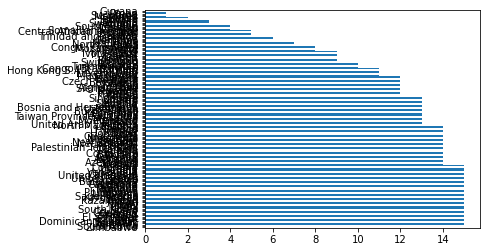

In [69]:
dff["Country name"].value_counts().plot.barh();

In [70]:
#data.loc[:,["area_mean","radius_mean"]]
dff1=dff.iloc[:100]
dff1

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
95,Azerbaijan,2008.0,4.817,9.465,0.684,62.64,0.601,-0.029,0.715,0.578,0.227
96,Azerbaijan,2009.0,4.574,9.534,0.736,63.02,0.498,-0.087,0.754,0.544,0.234
97,Azerbaijan,2010.0,4.219,9.569,0.687,63.40,0.501,-0.123,0.858,0.527,0.272
98,Azerbaijan,2011.0,4.680,9.540,0.725,63.64,0.537,-0.105,0.795,0.536,0.258


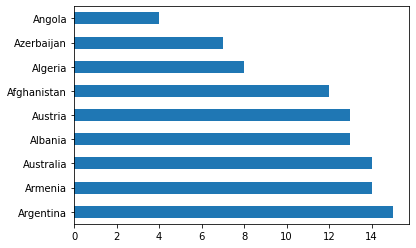

In [71]:
dff1["Country name"].value_counts().plot.barh();

In [72]:
dff_2020=dff[dff.year==2020]

In [73]:
dff_2020

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
24,Albania,2020.0,5.365,9.497000,0.710,69.3,0.754,0.007000,0.89100,0.679,0.265
51,Argentina,2020.0,5.901,9.850000,0.897,69.2,0.823,-0.122000,0.81600,0.764,0.342
79,Australia,2020.0,7.137,10.760000,0.937,74.2,0.905,0.210000,0.49100,0.769,0.205
92,Austria,2020.0,7.213,10.851000,0.925,73.6,0.912,0.011000,0.46400,0.769,0.206
117,Bahrain,2020.0,6.173,10.620000,0.848,69.7,0.945,0.132000,0.63612,0.790,0.297
...,...,...,...,...,...,...,...,...,...,...,...
1850,United States,2020.0,7.028,11.001000,0.937,68.1,0.850,0.034000,0.67800,0.787,0.295
1865,Uruguay,2020.0,6.310,9.937000,0.921,69.2,0.908,-0.084000,0.49100,0.807,0.265
1893,Venezuela,2020.0,4.574,8.559765,0.805,66.9,0.612,-0.024132,0.81100,0.722,0.396
1933,Zambia,2020.0,4.838,8.117000,0.767,56.3,0.750,0.056000,0.81000,0.691,0.345


<AxesSubplot:xlabel='Country name', ylabel='Generosity'>

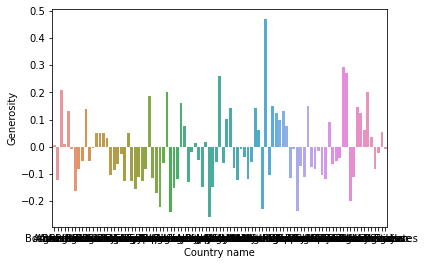

In [74]:
sns.barplot(x="Country name", y="Generosity", data=dff_2020)

<AxesSubplot:xlabel='Country name', ylabel='Generosity'>

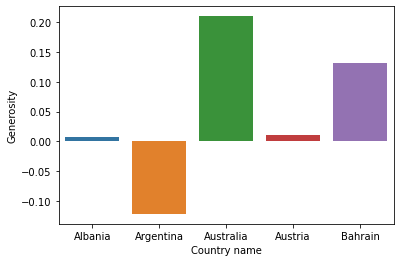

In [75]:
sns.barplot(x="Country name", y="Generosity", data=dff_2020.iloc[:5])

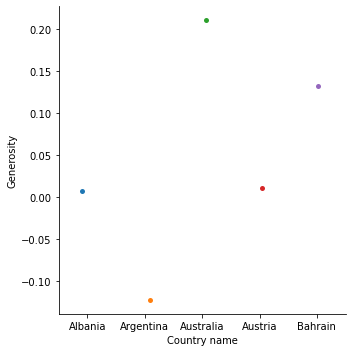

In [76]:
sns.catplot(x="Country name", y="Generosity", data=dff_2020.iloc[:5])

<AxesSubplot:xlabel='Country name', ylabel='Generosity'>

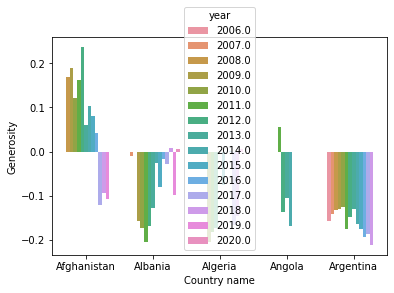

In [77]:
sns.barplot(x="Country name", y="Generosity", hue="year",data=dff.iloc[:50])

## Histogram

In [78]:
dff.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


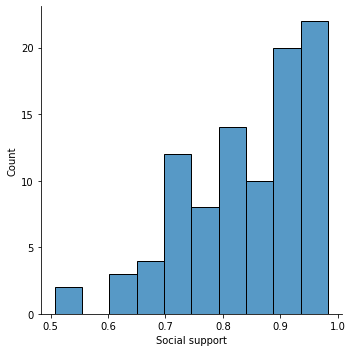

In [79]:
dff_2020=dff[dff.year==2020]
sns.displot(dff_2020["Social support"], bins=10,kde=False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Social support', ylabel='Density'>

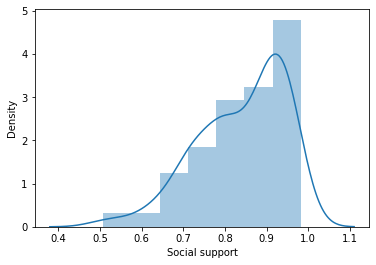

In [80]:
sns.distplot(dff_2020["Social support"]) 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Social support', ylabel='Density'>

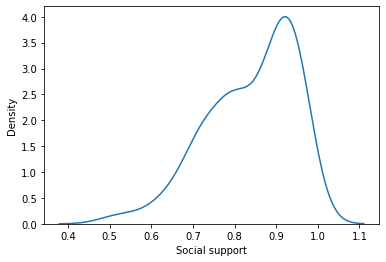

In [81]:
sns.distplot(dff_2020["Social support"], hist=False) 

<AxesSubplot:xlabel='Social support', ylabel='Density'>

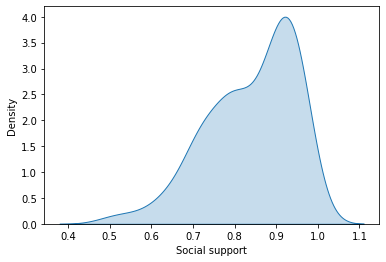

In [82]:
sns.kdeplot(dff_2020["Social support"], shade=True) 

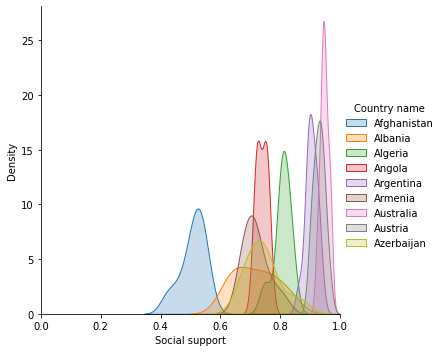

In [83]:
(sns
.FacetGrid(dff.iloc[0:100],
            hue="Country name",
            height=5,
            xlim=(0,1))
.map(sns.kdeplot,"Social support",shade=True )
.add_legend()
) 

## Box Plot

In [84]:
dff

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016.0,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017.0,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018.0,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019.0,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


<AxesSubplot:xlabel='Healthy life expectancy at birth'>

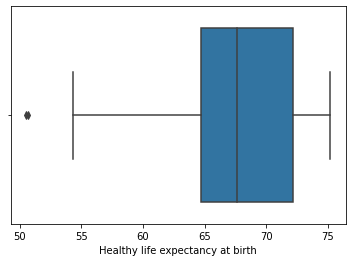

In [85]:
dff_2020=dff[dff.year==2020]
sns.boxplot(x=dff_2020["Healthy life expectancy at birth"])

In [86]:
dff[dff["Country name"]=="Turkey"]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1753,Turkey,2005.0,4.719,9.809,0.820,62.60,0.623,-0.130778,0.877,0.557,0.271866
1754,Turkey,2007.0,5.623,9.903,0.792,63.32,0.459,-0.178000,0.800,0.651,0.395000
1755,Turkey,2008.0,5.118,9.899,0.645,63.68,0.415,-0.189000,0.785,0.614,0.345000
1756,Turkey,2009.0,5.213,9.838,0.755,64.04,0.456,-0.227000,0.853,0.598,0.316000
1757,Turkey,2010.0,5.490,9.906,0.795,64.40,0.515,-0.187000,0.811,0.652,0.327000
1758,Turkey,2011.0,5.272,9.996,0.692,64.64,0.446,-0.242000,0.649,0.621,0.380000
1759,Turkey,2012.0,5.309,10.026,0.739,64.88,0.471,-0.216000,0.702,0.645,0.335000
1760,Turkey,2013.0,4.888,10.091,0.795,65.12,0.541,-0.229000,0.698,0.635,0.392000
1761,Turkey,2014.0,5.580,10.124,0.863,65.36,0.649,-0.024000,0.764,0.483,0.377000
1762,Turkey,2015.0,5.514,10.166,0.851,65.60,0.653,-0.016000,0.806,0.460,0.382000


<AxesSubplot:xlabel='Country name', ylabel='Healthy life expectancy at birth'>

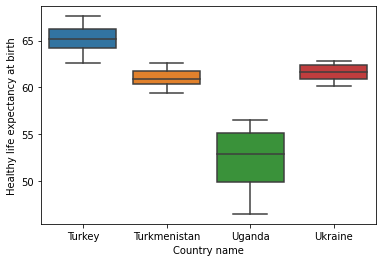

In [87]:
sns.boxplot(x="Country name",y="Healthy life expectancy at birth", data=dff.iloc[1753:1800])

## Violin Grafiği

In [88]:
dff["Country name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

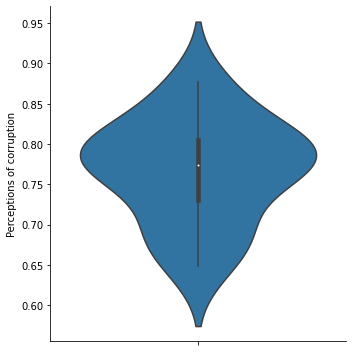

In [89]:
sns.catplot(y="Perceptions of corruption", kind="violin", data=dff[dff["Country name"]=="Turkey"]);

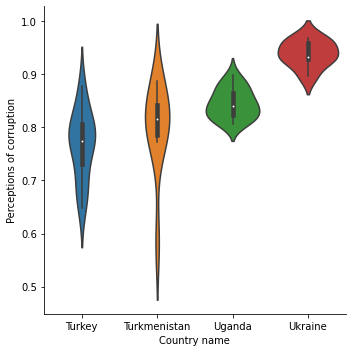

In [90]:
sns.catplot(x="Country name",y="Perceptions of corruption", kind="violin", data=dff.iloc[1753:1800]);

# Korelasyon Grafikleri

In [91]:
dff.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [92]:
dff_2020=dff[dff.year==2020]

<AxesSubplot:xlabel='Healthy life expectancy at birth', ylabel='Social support'>

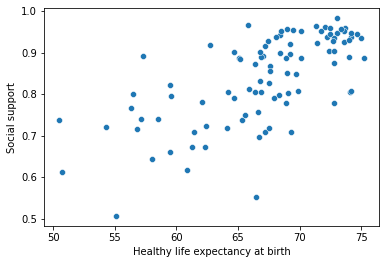

In [93]:
sns.scatterplot(x="Healthy life expectancy at birth",y="Social support",data=dff_2020)

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Social support'>

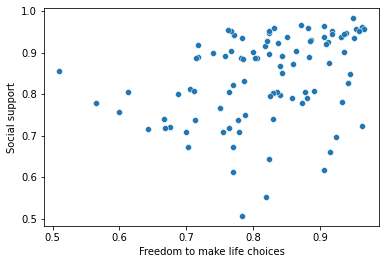

In [94]:
sns.scatterplot(x="Freedom to make life choices",y="Social support",data=dff_2020)

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Perceptions of corruption'>

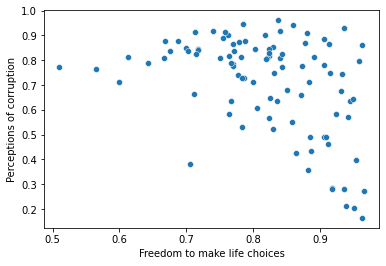

In [95]:
sns.scatterplot(x="Freedom to make life choices",y="Perceptions of corruption",data=dff_2020)

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Perceptions of corruption'>

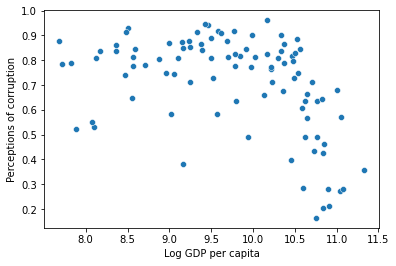

In [96]:
sns.scatterplot(x="Log GDP per capita",y="Perceptions of corruption",data=dff_2020)

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Perceptions of corruption'>

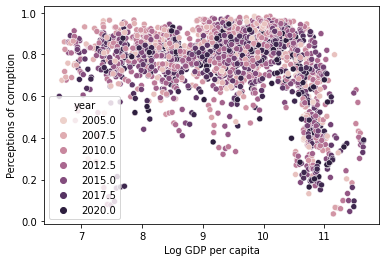

In [97]:
sns.scatterplot(x="Log GDP per capita",y="Perceptions of corruption",hue="year",data=dff)

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Perceptions of corruption'>

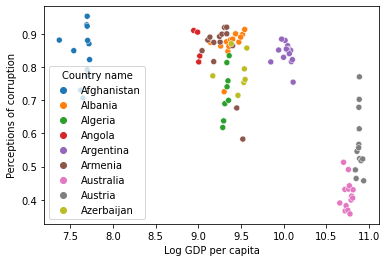

In [98]:
sns.scatterplot(x="Log GDP per capita",y="Perceptions of corruption",hue="Country name",data=dff.iloc[:100])

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Perceptions of corruption'>

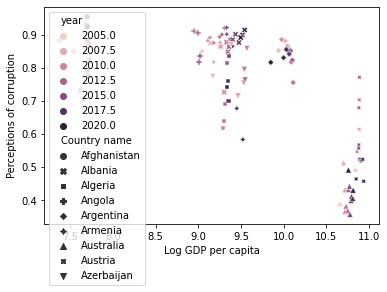

In [99]:
sns.scatterplot(x="Log GDP per capita",y="Perceptions of corruption",hue="year", style="Country name",data=dff[:100])

In [100]:
import matplotlib.pyplot as plt

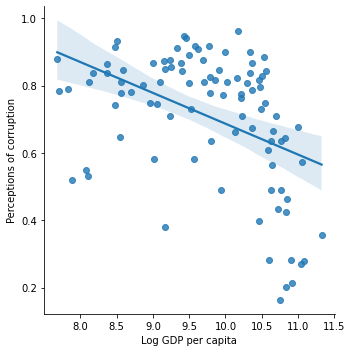

In [101]:
sns.lmplot(x="Log GDP per capita", y ="Perceptions of corruption", data=dff_2020)

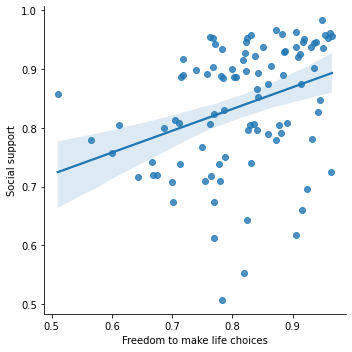

In [102]:
sns.lmplot(x="Freedom to make life choices",y="Social support",data=dff_2020)

In [103]:
dff.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


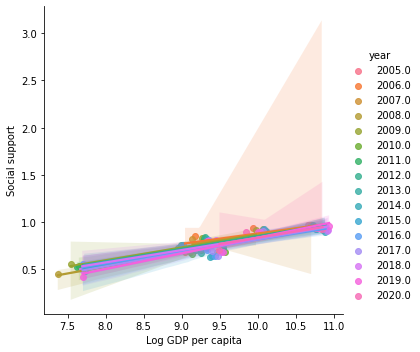

In [104]:
sns.lmplot(x="Log GDP per capita",y="Social support",hue="year",data=dff.iloc[:100])

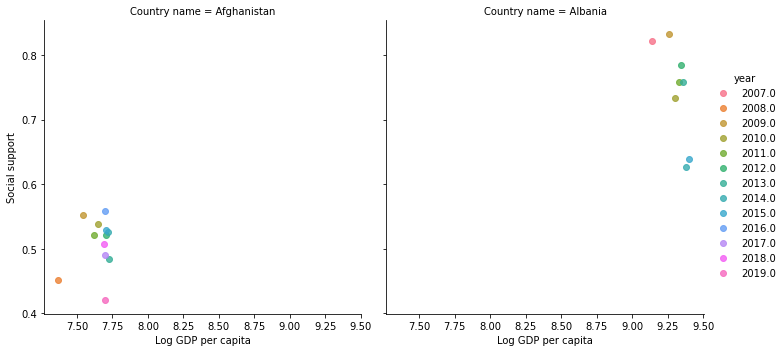

In [105]:
sns.lmplot(x="Log GDP per capita",y="Social support",hue="year",col="Country name",data=dff.iloc[:20])

## heat map

In [106]:
dff

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016.0,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017.0,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018.0,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019.0,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [107]:
dff_heat1=dff.pivot("Country name", "year", "Life Ladder")
dff_heat1

year,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Country name,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,3.724,4.402,4.758,3.832,3.783,3.572,3.131,3.983,4.220,2.662,2.694,2.375,NaN
Albania,NaN,NaN,4.634,NaN,5.485,5.269,5.867,5.510,4.551,4.814,4.607,4.511,4.640,5.004,4.995,5.365
Algeria,NaN,NaN,NaN,NaN,NaN,5.464,5.317,5.605,NaN,6.355,NaN,5.341,5.249,5.043,4.745,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589,4.360,3.937,3.795,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,6.313,6.073,5.961,6.424,6.441,6.776,6.468,6.582,6.671,6.697,6.427,6.039,5.793,6.086,5.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,7.17,6.525,NaN,6.258,7.189,7.478,6.580,7.067,6.553,6.136,5.569,4.041,5.071,5.006,5.081,4.574
Vietnam,NaN,5.294,5.422,5.480,5.304,5.296,5.767,5.535,5.023,5.085,5.076,5.062,5.175,5.296,5.467,NaN
Yemen,NaN,NaN,4.477,NaN,4.809,4.350,3.746,4.061,4.218,3.968,2.983,3.826,3.254,3.058,4.197,NaN


<AxesSubplot:xlabel='year', ylabel='Country name'>

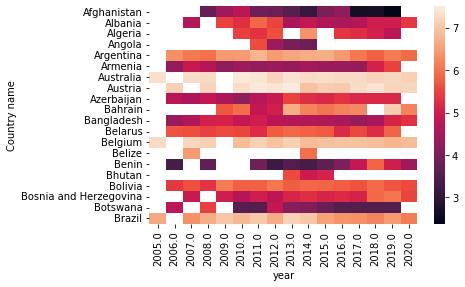

In [108]:
sns.heatmap(dff_heat1.iloc[:20])

In [109]:
dff_numeric=dff.select_dtypes(include = ['float64', 'int64']) 

<AxesSubplot:>

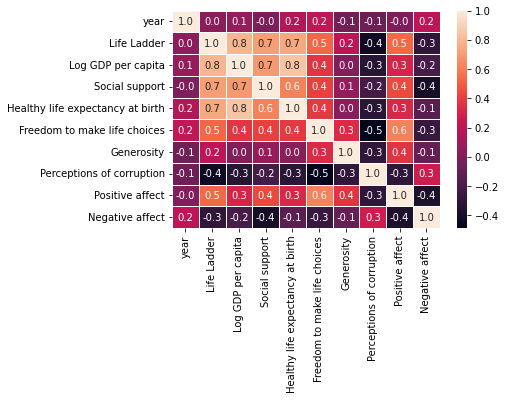

In [110]:
sns.heatmap(dff.corr(),annot= True,linewidths=0.5,fmt = ".1f")

## Çizgi Grafik

In [111]:
dff.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


<AxesSubplot:xlabel='year', ylabel='Log GDP per capita'>

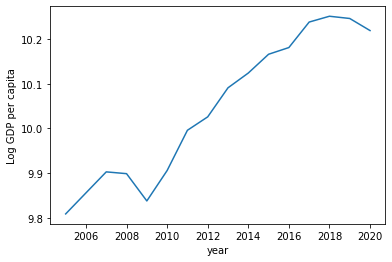

In [112]:
sns.lineplot(x="year", y="Log GDP per capita", data=dff[dff["Country name"]=="Turkey"])

<AxesSubplot:xlabel='year', ylabel='Log GDP per capita'>

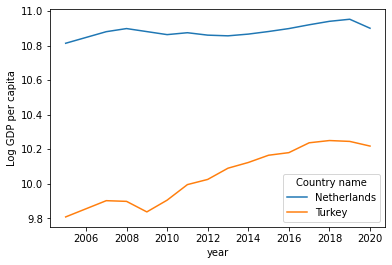

In [113]:
dff_2_contry=dff[(dff["Country name"]=="Turkey")|(dff["Country name"]=="Netherlands")]
sns.lineplot(x="year", y="Log GDP per capita", hue="Country name", data=dff_2_contry)

## basit zaman serisi

In [114]:
!pip install pandas_datareader

In [115]:
import pandas_datareader as pr

In [116]:
df_zaman= pr.get_data_yahoo("AAPL", start ="2016-01-01", end= "2021-08-25")

In [117]:
df_zaman.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.251442
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.643713
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.181009
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.202669
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.320068


In [118]:
vol=df_zaman.Volume

<AxesSubplot:xlabel='Date'>

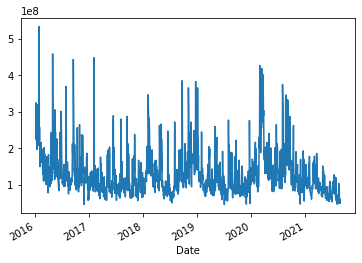

In [119]:
vol.plot()